## Importy ##

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, make_scorer, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Wczytywanie danych ##

In [2]:
file_path = 't-shirts.csv'
dataset = pd.read_csv(file_path)

## Analiza danych ##

In [3]:
display(dataset)

,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium
...,...,...,...,...,...
19995,M,polyester,white,short,medium
19996,M,linen,white,long,high
19997,XXL,cotton,cream,short,high
19998,L,nylon,cream,long,medium


Zbiór danych zawiera 20 tysięcy wierszy, które opisują rodzaje koszulek oraz zawierają informacje o ich zapotrzebowaniu.

Poszególne kolumny oznaczają:
size - rozmiar koszulki
material - materiał z którego jest wykonana
color - kolor koszulki
sleeves - długość rękawa (krótki albo długi)

## Problem ##

Postawionym problemem jest predykcja zapotrzebowania na koszulkę na podstawie jej cech z wykorzystaniem znanych modeli klasyfikacji.

## Sprawdzenie poprawności danych ##

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


Dane są czyste, nie zawierają żadnych pustych komórek. Wszystkie kolumny zawierają dane tekstowe.

## Wizualizacja danych ##

### Rozmiar ###

Text(0, 0.5, 'Zapotrzebowanie')

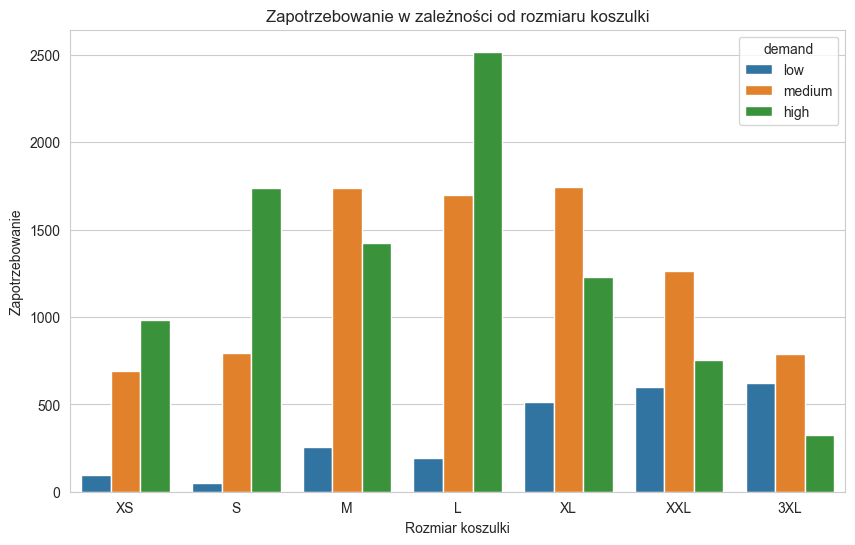

In [5]:
plt.figure(figsize=(10,6))
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='size', hue='demand', data=dataset, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'], hue_order=['low', 'medium', 'high'])
plt.title("Zapotrzebowanie w zależności od rozmiaru koszulki")
plt.xlabel("Rozmiar koszulki")
plt.ylabel("Zapotrzebowanie")

Text(0.5, 1.0, 'Ilość poszczególnych rozmiarów koszulek')

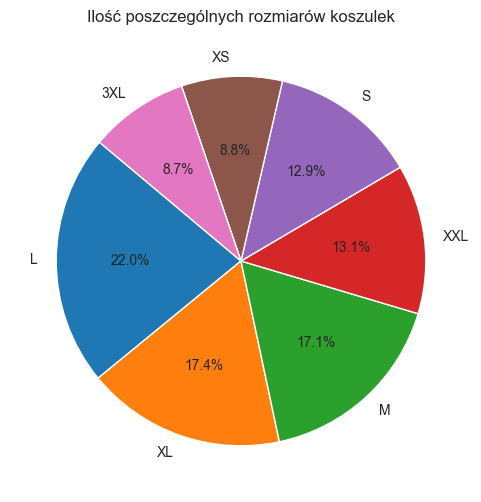

In [6]:
size_counts = dataset['size'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ilość poszczególnych rozmiarów koszulek')

Koszulek w rozmiarze L jest najwięcej rodzajów i jest na nie największe zapotrzebowanie. Jest to logiczne ponieważ jest to środkowy rozmiar. Im mniejszy lub większy rozmiar tym mniej rodzajów koszulek natomiast mimo to na koszulki w mniejszych rozmiarach dalej jest duże zapotrzebowanie w przeciwieństwie do dużych romiarów.

### Materiał ###

Text(0, 0.5, 'Zapotrzebowanie')

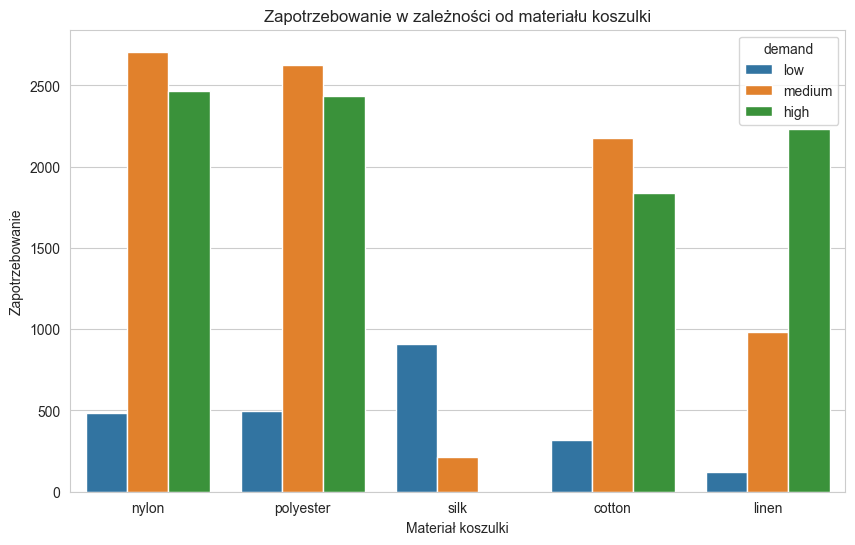

In [7]:
plt.figure(figsize=(10,6))
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='material', hue='demand', data=dataset, hue_order=['low', 'medium', 'high'])
plt.title("Zapotrzebowanie w zależności od materiału koszulki")
plt.xlabel("Materiał koszulki")
plt.ylabel("Zapotrzebowanie")

Koszulek nylonowych i poliestrowych jest najwięcej rodzajów oraz jest na nie średnio-duże zapotrzebowanie. Koszulek jedwabnych jest najmniej rodzajów oraz zapotrzebowanie na jest zdecydowanie najmniejsze. Koszulek lnianych jest mniej rodzajów niż nylonowych i poliestrowych ale cechują się one średnio większym zapotrzebowaniem.

### Kolor ###

Text(0, 0.5, 'Zapotrzebowanie')

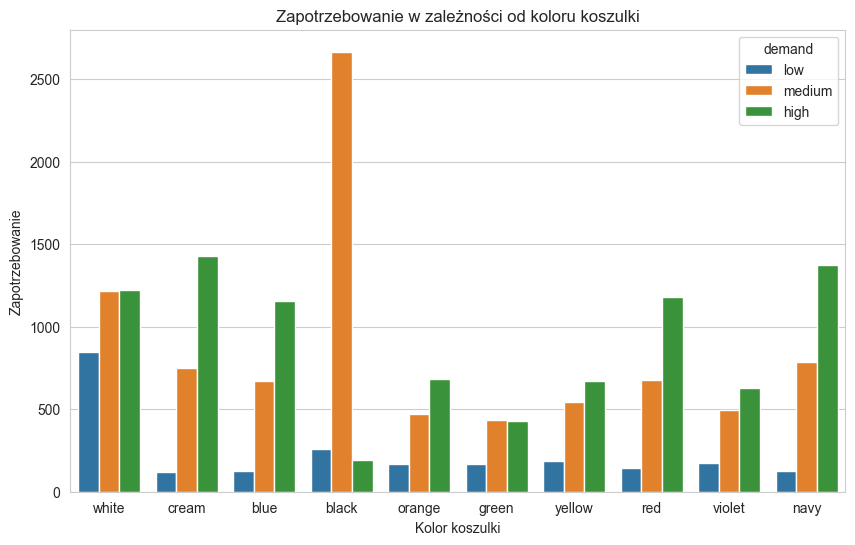

In [8]:
plt.figure(figsize=(10,6))
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='color', hue='demand', data=dataset, hue_order=['low', 'medium', 'high'])
plt.title("Zapotrzebowanie w zależności od koloru koszulki")
plt.xlabel("Kolor koszulki")
plt.ylabel("Zapotrzebowanie")

Text(0.5, 1.0, 'Ilość poszczególnych kolorów koszulek')

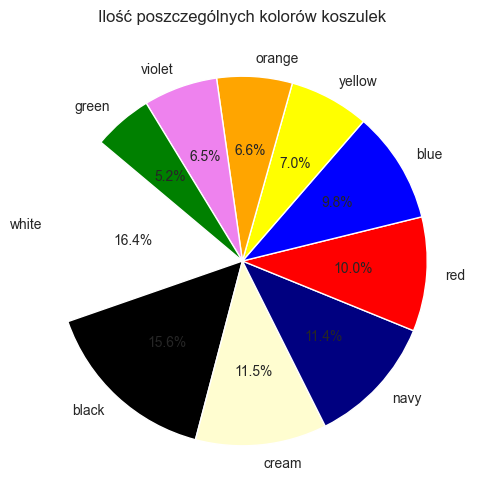

In [9]:
color_counts = dataset['color'].value_counts()

color_map = {
    'red': 'red',
    'blue': 'blue',
    'green': 'green',
    'yellow': 'yellow',
    'black': 'black',
    'white': 'white',
    'violet': 'violet',
    'orange': 'orange',
    'cream': '#FFFDD0',
    'navy': '#000080'
}

colors = [color_map[color] for color in color_counts.index]

plt.figure(figsize=(6,6))
plt.pie(color_counts, labels=color_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ilość poszczególnych kolorów koszulek')

Bez zaskoczenia najwięcej jest rodzajów koszulek w kolorze czarnym i białym, gdyż są to najbardziej uniwersalne kolory natomiast co ciekawe koszulki w kolorze czarnym mają znacznej większości średnie zapotrzebowanie, natomiest koszulki w kolorze białym kolorze mają zróżnicowane zapotrzebowanie. Reszta kolorów wypada podobnie do siebie przez myślę że jest co cecha, które będzie miała mniejsze znaczenie przy klasyfikacji.

### Rękawy ###

Text(0, 0.5, 'Zapotrzebowanie')

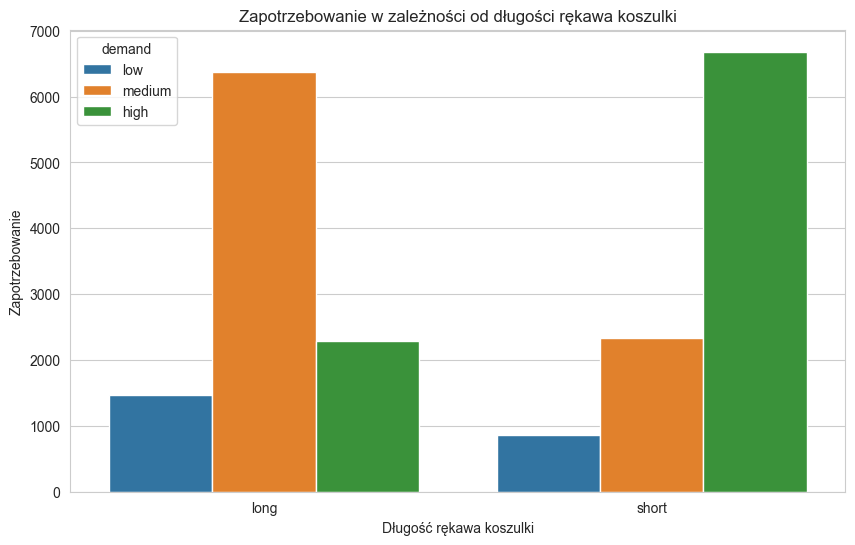

In [10]:
plt.figure(figsize=(10,6))
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='sleeves', hue='demand', data=dataset, hue_order=['low', 'medium', 'high'])
plt.title("Zapotrzebowanie w zależności od długości rękawa koszulki")
plt.xlabel("Długość rękawa koszulki")
plt.ylabel("Zapotrzebowanie")

Ilość rodzajów koszulek z długim i krótkim rękawem jest prawie że identyczna natomiast koszulki z krótkim rękawem mają średnio wysokie zapotrzebowanie, natomiast koszulki z długim rękawem średnie zapotrzebowanie. Na tym etapie możemy też zauważyć, że koszulki mają generalnie wysokie albo średnie zapotrzebowanie a więc klasyfikacja nie jest rozłożona równomiernie co za chwilę dokładniej zbadamy.

### Zapotrzebowanie ###

Text(0.5, 1.0, 'Ilość poszczególnych kolorów koszulek')

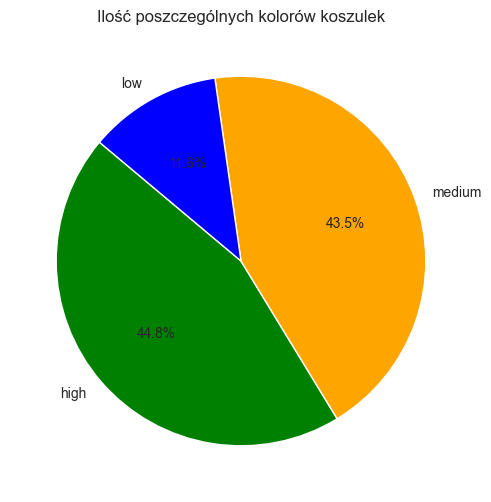

In [11]:
demand_counts = dataset['demand'].value_counts()

color_map = {
    'low': 'blue',
    'medium': 'orange',
    'high': 'green'
}

colors = [color_map[color] for color in demand_counts.index]

plt.figure(figsize=(6,6))
plt.pie(demand_counts, labels=demand_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ilość poszczególnych kolorów koszulek')

Wysokie i średnie zapotrzebowanie są przeważającymi kategoriami, natomiast niskie zapotrzebowanie występuje jedynie w lekko ponad 10% przypadków. Warto mieć to na uwadze, ponieważ przy specyficznym podziale danych na zbiór treningowy i testowy klasyfikatory mogą mieć problem z rozpoznawanie tego przypadku przez zbyt małą ilość danych treningowych.

## Przygotowanie danych ##

In [12]:
display(dataset)

,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium
...,...,...,...,...,...
19995,M,polyester,white,short,medium
19996,M,linen,white,long,high
19997,XXL,cotton,cream,short,high
19998,L,nylon,cream,long,medium


### Kodowanie kategorii ###

In [13]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(dataset.drop('demand', axis=1))

# Konwersja do DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(dataset.drop('demand', axis=1).columns))

# Dodanie kolumny 'demand' do zakodowanych danych
encoded_df['demand'] = dataset['demand']

# Wyświetlenie zakodowanych danych
display(encoded_df)

,size_3XL,size_L,size_M,size_S,size_XL,size_XS,size_XXL,material_cotton,material_linen,material_nylon,...,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow,sleeves_long,sleeves_short,demand
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,medium
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,high
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,medium
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,medium
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,medium
19996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,high
19997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,high
19998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,medium


Za pomocą kodowania kategorii zamieniliśmy wartości tekstowe na liczbowe. Rozbiliśmy wszystkie rodzaje cech na osobne kolumny, w których 1 oznacza, że dana koszulka posiada następująca właściwość.

### PCA ###

In [14]:
X = encoded_df.drop('demand', axis=1)
y = encoded_df['demand']

# Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Konwersja do DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
pca_df['demand'] = y

# Wyświetlenie danych po PCA
display(pca_df)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,demand
0,-0.690253,0.692781,-0.351361,-0.103139,-0.090951,-0.083764,0.782414,-0.626238,0.254703,0.763492,medium
1,0.716642,-0.676711,-0.359400,-0.353123,-0.216272,0.734829,0.034919,0.396862,-0.327495,-0.032561,high
2,0.724875,-0.029729,0.092461,-0.178535,0.101986,-0.026000,-0.063309,-0.458230,-0.375845,0.679697,medium
3,0.713639,-0.010743,0.760442,-0.307802,-0.436759,-0.705683,-0.649832,0.378225,0.672873,0.068012,medium
4,-0.693661,-0.693799,-0.375679,-0.349406,-0.206711,0.735293,0.073561,0.410013,-0.071125,-0.014599,medium
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.724290,-0.688719,-0.430021,-0.279278,-0.164044,-0.752814,0.759703,0.358498,0.442490,0.012996,medium
19996,-0.693809,-0.013894,0.216735,-0.431791,0.877392,-0.767611,0.734744,0.387553,0.439529,0.012862,high
19997,0.707941,-0.009806,0.809620,-0.117972,-0.381274,-0.052995,-0.119187,-0.580912,-0.359835,-0.724457,high
19998,-0.701879,0.729475,-0.342748,0.842109,-0.022176,0.057164,-0.068365,0.141732,-0.383379,-0.005526,medium


PCA czyli anliza głównych składowych pozwala na redukcję wymiarowości danych. W ten sposób udało się zmniejszyć liczbę kolumn z 24 do wybranej liczby.

### Standaryzacja ###

In [15]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(encoded_df.drop('demand', axis=1))

# Konwersja do DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=encoded_df.columns[:-1])
standardized_df['demand'] = encoded_df['demand']

# Wyświetlenie danych po standaryzacji
display(standardized_df)

,size_3XL,size_L,size_M,size_S,size_XL,size_XS,size_XXL,material_cotton,material_linen,material_nylon,...,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow,sleeves_long,sleeves_short,demand
0,-0.308205,-0.531704,-0.453692,2.595562,-0.45897,-0.311017,-0.387751,-0.525975,-0.447428,1.593289,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,2.255311,-0.274457,0.988368,-0.988368,medium
1,-0.308205,-0.531704,-0.453692,-0.385273,2.17879,-0.311017,-0.387751,-0.525975,-0.447428,-0.627632,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,-0.443398,-0.274457,-1.011769,1.011769,high
2,-0.308205,-0.531704,-0.453692,2.595562,-0.45897,-0.311017,-0.387751,-0.525975,-0.447428,-0.627632,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,-0.443398,-0.274457,-1.011769,1.011769,medium
3,-0.308205,-0.531704,2.204139,-0.385273,-0.45897,-0.311017,-0.387751,1.901230,-0.447428,-0.627632,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,-0.443398,-0.274457,-1.011769,1.011769,medium
4,-0.308205,-0.531704,-0.453692,-0.385273,2.17879,-0.311017,-0.387751,-0.525975,-0.447428,-0.627632,...,-0.233611,-0.359502,3.761850,-0.333333,-0.263121,-0.443398,-0.274457,0.988368,-0.988368,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.308205,-0.531704,2.204139,-0.385273,-0.45897,-0.311017,-0.387751,-0.525975,-0.447428,-0.627632,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,2.255311,-0.274457,-1.011769,1.011769,medium
19996,-0.308205,-0.531704,2.204139,-0.385273,-0.45897,-0.311017,-0.387751,-0.525975,2.234995,-0.627632,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,2.255311,-0.274457,0.988368,-0.988368,high
19997,-0.308205,-0.531704,-0.453692,-0.385273,-0.45897,-0.311017,2.578974,1.901230,-0.447428,-0.627632,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,-0.443398,-0.274457,-1.011769,1.011769,high
19998,-0.308205,1.880746,-0.453692,-0.385273,-0.45897,-0.311017,-0.387751,-0.525975,-0.447428,1.593289,...,-0.233611,-0.359502,-0.265827,-0.333333,-0.263121,-0.443398,-0.274457,0.988368,-0.988368,medium


Standaryzacja danych zmieniła wartości z 0 i 1 na wartości, które mają średnią wartość 0 oraz odchylenie standardowe równe 1.

### Metoda podziału na zbiory treningowe i testowe ###

Dane są dzielone na zbiór treningowy i testowy w stosunku 80:20.

In [16]:
def split_dataset(dataset):
    return train_test_split(dataset.drop('demand', axis=1), dataset['demand'], test_size=0.2, random_state=42)

## Porównanie jakości klasyfikacji dla różnego przetworzenia danych ##

In [17]:
def classify_and_report(dataset, classifier=GaussianNB()):
    X_train, X_test, y_train, y_test = split_dataset(dataset)
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    class_order = ['high', 'medium', 'low']

    cm = confusion_matrix(y_test, y_pred, labels=class_order)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_order)
    disp.plot()
    plt.title(f'Macierz pomyłek')
    plt.show()

    # Wybrane metryki
    report = classification_report(y_test, y_pred, target_names=class_order, labels=class_order, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])
    report_df = report_df.reindex(class_order)
    return report_df[['precision', 'recall', 'f1-score', 'support']]

Zbiory danych będą porównywane na naiwnym klasyfikatorze Bayesa z domyślnymi hiperparametrami.

### Tylko zakodowane dane ###

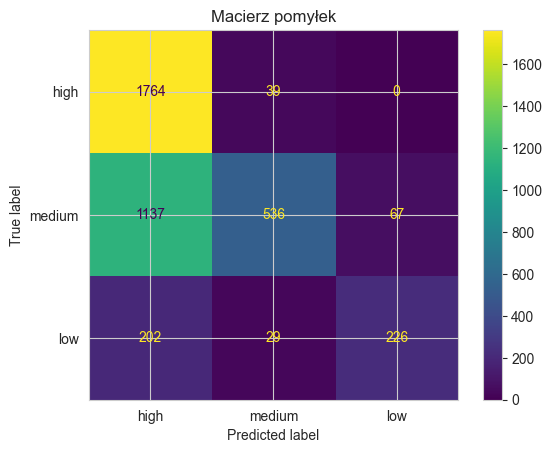

In [18]:
encoded_report = classify_and_report(encoded_df)

### Dane po standaryzacji ###

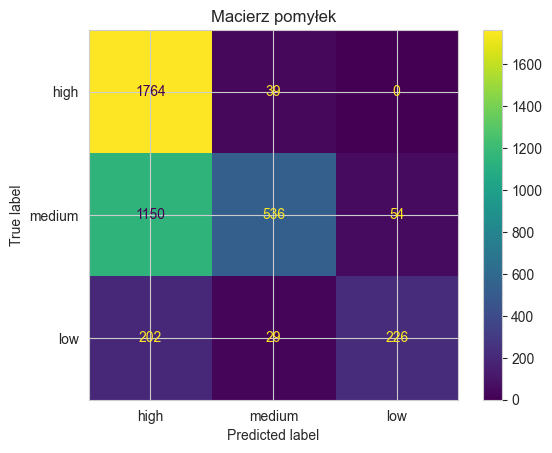

In [19]:
standardized_report = classify_and_report(standardized_df)

### Dane po PCA ###

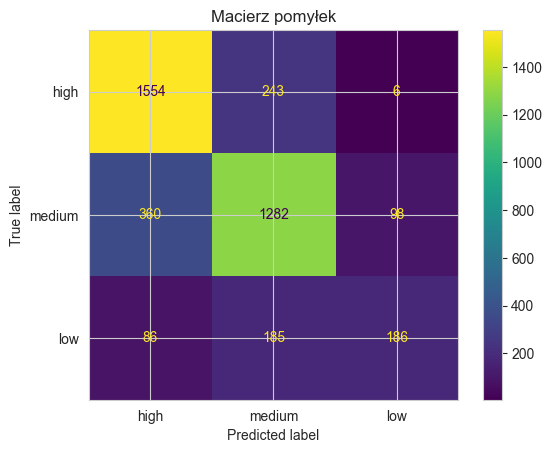

In [20]:
pca_report = classify_and_report(pca_df)

### Porównanie metryk ###

In [21]:
print("Wyniki klasyfikacji na jedynie zakodowanych danych:")
print(encoded_report)
print()
print("Wyniki klasyfikacji na danych po standaryzacji:")
print(standardized_report)
print()
print("Wyniki klasyfikacji na danych po PCA:")
print(pca_report)

Wyniki klasyfikacji na jedynie zakodowanych danych:
        precision    recall  f1-score  support
high     0.568482  0.978369  0.719119   1803.0
medium   0.887417  0.308046  0.457338   1740.0
low      0.771331  0.494530  0.602667    457.0

Wyniki klasyfikacji na danych po standaryzacji:
        precision    recall  f1-score  support
high     0.566110  0.978369  0.717219   1803.0
medium   0.887417  0.308046  0.457338   1740.0
low      0.807143  0.494530  0.613297    457.0

Wyniki klasyfikacji na danych po PCA:
        precision    recall  f1-score  support
high     0.777000  0.861897  0.817250   1803.0
medium   0.749708  0.736782  0.743188   1740.0
low      0.641379  0.407002  0.497992    457.0


Standaryzacja praktycznie nie wpłynęła na wyniki. Nastąpiła jedynie lekka zmiana w precyzji. Dane bez standaryzacji miały lepszą precyzję dla klasy high, zaś dane po standaryzacji osiągnęły lepszą precyzję dla klasy low. W gruncie rzeczy nastąpiła pomyłka dla tych samych 13 rekordów tylko w inną stronę. Na obu zbiorach klasyfikator bardzo słabo poradził sobie z rozpoznawaniem klasy medium, gdzie większość przypadków klasyfikował jako high.
Natomiast ciekawsze wyniki przyniosła klasyfikacja zbioru po przetworzeniu PCA. Tutaj klasyfikator bardzo dobrze poradził sobie z rozpoznawaniem klasy high i medium, natomiast gorzej sobie poradził z klasą low. Prawdopodobnie przez stosunkowo małą ilość danych z tej klasy nie udało się wystarczająco nauczyć jej rozpoznawania. Warto też wspomnieć o dobraniu odpowiedniej ilości wymiarów w PCA. Ja ograniczyłem zbiór do 10 wymiarów, ponieważ z testowanych przeze mnie konfiguracji ta dawała najlepsze wyniki, natomiast może istnieć konfiguracja, która dałaby jeszcze lepsze wyniki dla naszego problemu. Reasumując uważam, że klasyfikacja danych po przetworzeniu PCA dała najlepsze efekty.

## Porównanie wyników klasyfikacji dla różnych algorytmów klasyfikacji ##

In [22]:
def classify_and_report_with_grid_search(dataset, classifier, param_grid):
    X_train, X_test, y_train, y_test = split_dataset(dataset)

    # Grid Search
    grid_search = GridSearchCV(classifier, param_grid, scoring='f1_micro', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    class_order = ['high', 'medium', 'low']

    # Macierz pomyłek
    cm = confusion_matrix(y_test, y_pred, labels=class_order)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_order)
    disp.plot()
    plt.title(f'Macierz pomyłek ')
    plt.show()

    print(f"Najlepsze parametry: {grid_search.best_params_}")

    # Wybrane metryki
    report = classification_report(y_test, y_pred, output_dict=True, labels=class_order, target_names=class_order)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

    return report_df[['precision', 'recall', 'f1-score', 'support']]

Przetestujemy drzewo decyzyjne, las losowy oraz klasyfikator wektorów nośnych z paroma konfiguracjami hiperparametrów, wybierzemy najlepsze konfiguracje za pomocą metryki f1, a następnie dla najlepszych konfiguracji dokonamy porównania metryk. Klasyfikatory porównamy na zbiorze danych po przetworzeniu PCA.

### Naiwny klasyfikator Bayesa ###

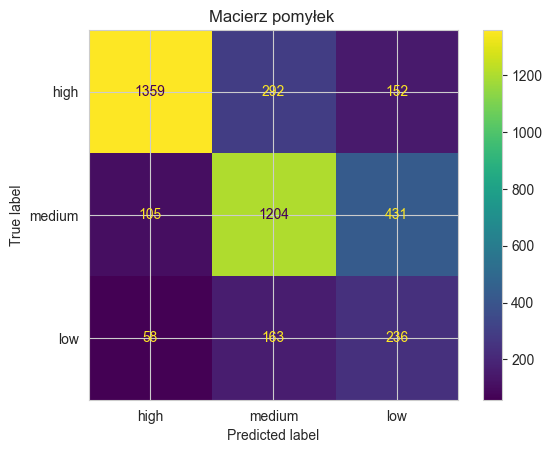

Najlepsze parametry: {'priors': [0.3, 0.3, 0.4], 'var_smoothing': 0.1}


In [23]:
gnb = GaussianNB()
gnb_param_grid = {
    'priors': [[1.0/3.0, 1.0/3.0, 1.0/3.0], [0.25, 0.25, 0.5], [0.4, 0.4, 0.2], [0.3, 0.3, 0.4]],
    'var_smoothing': [0.1]
}

gnb_report = classify_and_report_with_grid_search(pca_df, gnb, gnb_param_grid)

### Drzewo decyzyjne ###

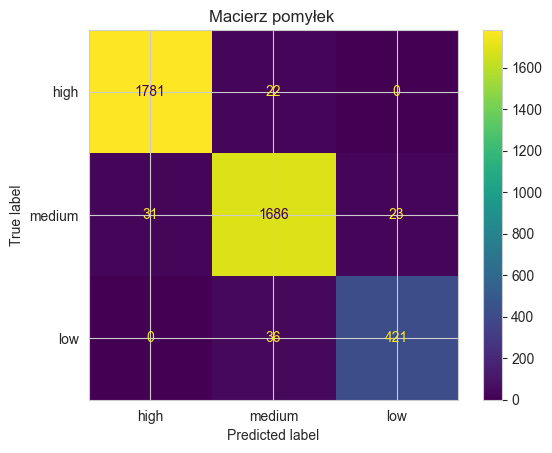

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}


In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_report = classify_and_report_with_grid_search(pca_df, dt, dt_param_grid)

### Las losowy ###

Las losowy jest złożeniem wielu drzew decyzyjnych. Dzieki temu dobrze radzi sobie z redukowaniem efektu przeuczenia występującego w przypadku drzew decyzyjnych. Spróbowałem konfiguracji z różną ilością drzew, maksymalną głębokością przeszukiwania, oraz minimalną liczbą próbek wymaganych do podziału węzła wewnętrznego.

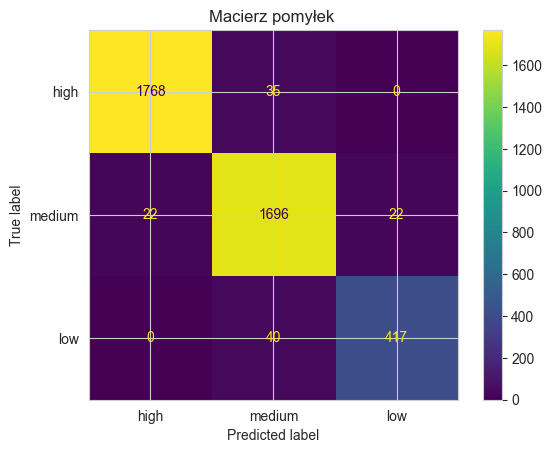

Najlepsze parametry: {'max_depth': 18, 'min_samples_split': 6, 'n_estimators': 5}


In [25]:
rf = RandomForestClassifier(random_state=42)
# rf_param_grid = {
#     'n_estimators': [5, 10, 50, 100],
#     'max_depth': [i*3+6 for i in range(5)],
#     'min_samples_split': [i*2+2 for i in range(3)]
# }

rf_param_grid = {
    'n_estimators': [5],
    'max_depth': [18],
    'min_samples_split': [6]
}

rf_report = classify_and_report_with_grid_search(pca_df, rf, rf_param_grid)

### Klasyfikator wektorów nośnych ###

Model SVM dobrze sobie radzi w przypadku danych o wysokiej wymiarowości. Parametr gamma wpływa na luźność modelu, natomiast zwiększanie wartości C powinno minimalizować błędy dopasowania.

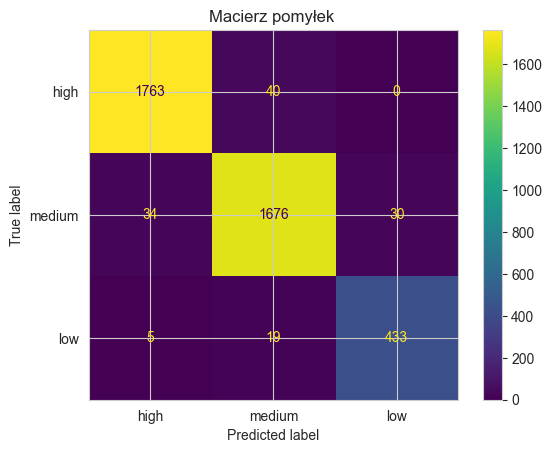

Najlepsze parametry: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [26]:
svm = SVC()
# svm_param_grid = {
#     'C': [0.1, 1, 5, 10, 25, 50],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

svm_param_grid = {
    'C': [50],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale']
}

svm_report = classify_and_report_with_grid_search(pca_df, svm, svm_param_grid)

### Porównanie metryk ###

In [27]:
print("Wyniki naiwnego klasyfikatora Bayesa:")
print(gnb_report)
print()
print("Wyniki drzewa decyzyjnego:")
print(dt_report)
print()
print("Wyniki lasy losowego:")
print(rf_report)
print()
print("Wyniki klasyfikatora wektorów nośnych:")
print(svm_report)

Wyniki naiwnego klasyfikatora Bayesa:
        precision    recall  f1-score  support
high     0.892904  0.753744  0.817444   1803.0
medium   0.725738  0.691954  0.708444   1740.0
low      0.288156  0.516411  0.369906    457.0

Wyniki drzewa decyzyjnego:
        precision    recall  f1-score  support
high     0.982892  0.987798  0.985339   1803.0
medium   0.966743  0.968966  0.967853   1740.0
low      0.948198  0.921225  0.934517    457.0

Wyniki lasy losowego:
        precision    recall  f1-score  support
high     0.987709  0.980588  0.984136   1803.0
medium   0.957651  0.974713  0.966107   1740.0
low      0.949886  0.912473  0.930804    457.0

Wyniki klasyfikatora wektorów nośnych:
        precision    recall  f1-score  support
high     0.978357  0.977815  0.978086   1803.0
medium   0.965994  0.963218  0.964604   1740.0
low      0.935205  0.947484  0.941304    457.0


Zdecydowanie najgorzej poradził sobie naiwny klasyfikator Bayesa. Przede wszystkim może to wynikać z ograniczonych możliwości ustawienia hiperatrybutów. Z moich obserwacji wynikło, że atrybut var_smothing nie miał żadnego wpływu na wynik a więc jedynie ustawienie większego priorytetu dla klasy low zmieniło rozpoznawanie tej klasy, z którą klasyfikator bardzo słabo sobie radził. Drzewo decyzyjne było minimalnie lepsze w większości aspektów od lasu losowego. Natomiast najlepiej z rozpoznawaniem klasy low poradził sobie klasyfikator wektorów nośnych. Co prawda wskazał on więcej przypadków mylnie jak niskie zapotrzebowanie (precyzja mniejsza niż u drzewa decyzyjnego i lasu losowego) ale za to nadrabia w czułości dla tej klasy. Trzeba pamiętać, że na wyniki miał wpływ dobór hiperparametrów, który mógł być korzystniejszy dla niektórych modeli. Moim zadaniem nie było znalezienie jak najlepszych konfiguracji lecz jedynie pokazanie wpływu doboru hiperparametrów na metryki. Generalnie wszystkie klasyfikatory z wyjątkiem naiwnego klasyfikatora Bayesa bardzo dobrze sobie poradziły z problemem. F1 score na poziomie powyżej 90% dla wszystkich klas to bardzo wysoki wynik, który może świadczyć o tym, że zależności w zapotrzebowaniu na konkretne koszulki na podstawie ich cech są silnie zauważalne.

## Porównanie drzewa decyzyjnego z losowymi parametrami i najlepszymi wyznaczonymi parametrami ##

### Losowe parametry ###

Zmieniłem głębokość z 15 na 5 oraz minimalną liczbę próbek do podziału wewnętrznego z 2 na 5.

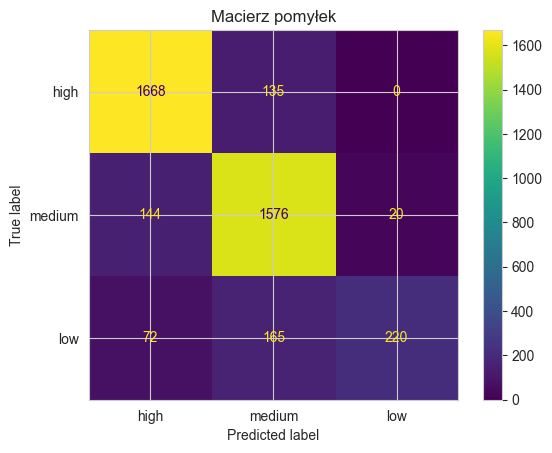

In [28]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5, criterion='gini')
dt_default_report = classify_and_report(pca_df, classifier=dt)

### Najlepsze parametry ###

Najlepsze znalezione parametry są takie same jak domyślne z wyjątkiem głębokości ustawionej na 15.

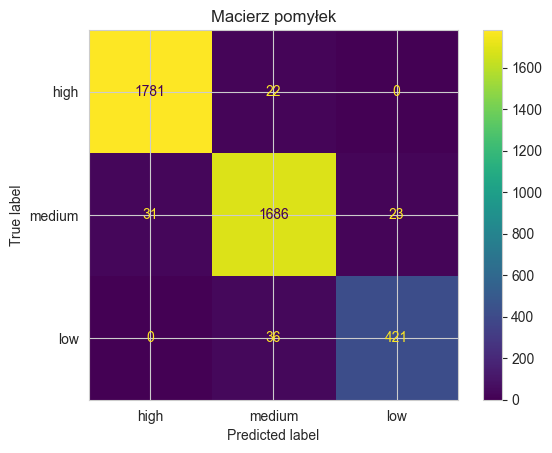

In [29]:
dt = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=2, criterion='gini')
dt_best_report = classify_and_report(pca_df, classifier=dt)

In [30]:
print("Wyniki drzewa decyzyjnego z domyślnymi parametrami:")
print(dt_default_report)
print()
print("Wyniki drzewa decyzyjnego z głębokością 15:")
print(dt_best_report)
print()

Wyniki drzewa decyzyjnego z domyślnymi parametrami:
        precision    recall  f1-score  support
high     0.885350  0.925125  0.904801   1803.0
medium   0.840085  0.905747  0.871681   1740.0
low      0.916667  0.481400  0.631277    457.0

Wyniki drzewa decyzyjnego z głębokością 15:
        precision    recall  f1-score  support
high     0.982892  0.987798  0.985339   1803.0
medium   0.966743  0.968966  0.967853   1740.0
low      0.948198  0.921225  0.934517    457.0



Po zmniejszeniu głębokości oraz zwiększenia minimalnych próbek najbardziej klasyfikator stracił na czułości klasy low. Rekordy, które rzeczwiście mają niskie zapotrzebowanie są słabo rozpoznawalne.